<font color=red size=3> 模块一 导入模块、数据与数据预览 </font>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt



large = 22; med = 16; small = 12

params = {'axes.titlesize': large,

          'legend.fontsize': med,

          'figure.figsize': (12, 8),

          'axes.labelsize': med,

          'axes.titlesize': med,

          'xtick.labelsize': med,

          'ytick.labelsize': med,

          'figure.titlesize': large}

plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
data_raw=pd.read_csv('d:/datafortest/accepts.csv')
data_raw.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


<font color=red size=3> 模块二，数据清洗、集成、变换与规约 </font>

<font color=red size=3>  2.1 数据的探索 </font>

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 25 columns):
application_id    5845 non-null int64
account_number    5845 non-null int64
bad_ind           5845 non-null int64
vehicle_year      5844 non-null float64
vehicle_make      5546 non-null object
bankruptcy_ind    5628 non-null object
tot_derog         5632 non-null float64
tot_tr            5632 non-null float64
age_oldest_tr     5629 non-null float64
tot_open_tr       4426 non-null float64
tot_rev_tr        5207 non-null float64
tot_rev_debt      5367 non-null float64
tot_rev_line      5367 non-null float64
rev_util          5845 non-null int64
fico_score        5531 non-null float64
purch_price       5845 non-null float64
msrp              5844 non-null float64
down_pyt          5845 non-null float64
loan_term         5845 non-null int64
loan_amt          5845 non-null float64
ltv               5844 non-null float64
tot_income        5840 non-null float64
veh_mileage       5844 no

In [10]:
data_raw.shape

(5845, 25)

In [11]:
data_raw.describe()

,application_id,account_number,bad_ind,vehicle_year,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
count,5.845000e+03,5.845000e+03,5845.000000,5844.000000,5632.000000,5632.000000,5629.000000,4426.000000,5207.000000,5367.000000,5367.000000,5845.000000,5531.000000,5845.000000,5844.000000,5845.000000,5845.000000,5845.000000,5844.00000,5.840000e+03,5844.000000,5845.000000,5845.000000
mean,5.039359e+06,5.021740e+06,0.204790,1901.793634,1.910156,17.084695,154.304317,5.720063,3.093336,6218.619899,18262.655674,43.444482,693.528657,19145.235109,18643.180243,1325.375624,56.806159,17660.066222,98.78525,6.206255e+03,20167.981348,0.564756,3.982036
std,2.880450e+06,2.873516e+06,0.403583,488.024392,3.274744,10.814056,99.940540,3.165783,2.401923,8657.667616,20942.605070,75.289977,57.841522,9356.070282,10190.495573,2435.177463,14.547659,9095.267595,18.08215,1.073186e+05,29464.181138,0.495831,1.513436
min,4.065000e+03,1.161300e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443.000000,0.000000,0.000000,0.000000,12.000000,2133.400000,0.00000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.513980e+06,2.567174e+06,0.000000,1997.000000,0.000000,9.000000,78.000000,3.000000,1.000000,791.000000,3235.500000,5.000000,653.000000,12684.000000,12050.000000,0.000000,51.000000,11023.000000,90.00000,2.218245e+03,1.000000,0.000000,4.750000
50%,5.110443e+06,4.988152e+06,0.000000,1999.000000,0.000000,16.000000,137.000000,5.000000,3.000000,3009.000000,10574.000000,30.000000,693.000000,18017.750000,17475.000000,500.000000,60.000000,16200.000000,100.00000,3.400000e+03,8000.000000,1.000000,4.750000
75%,7.526973e+06,7.556672e+06,0.000000,2000.000000,2.000000,24.000000,205.000000,7.000000,4.000000,8461.500000,26196.000000,66.000000,735.500000,24500.000000,23751.250000,1750.000000,60.000000,22800.000000,109.00000,5.156250e+03,34135.500000,1.000000,4.750000
max,1.000012e+07,1.001022e+07,1.000000,9999.000000,32.000000,77.000000,588.000000,26.000000,24.000000,96260.000000,205395.000000,2500.000000,848.000000,111554.000000,222415.000000,35000.000000,660.000000,111554.000000,176.00000,8.147167e+06,999999.000000,1.000000,4.750000


In [12]:
data_raw.bad_ind.sum()/data_raw.bad_ind.count()

0.20479041916167665

<font color=red size=3>  2.2 缺失值的查看 </font>

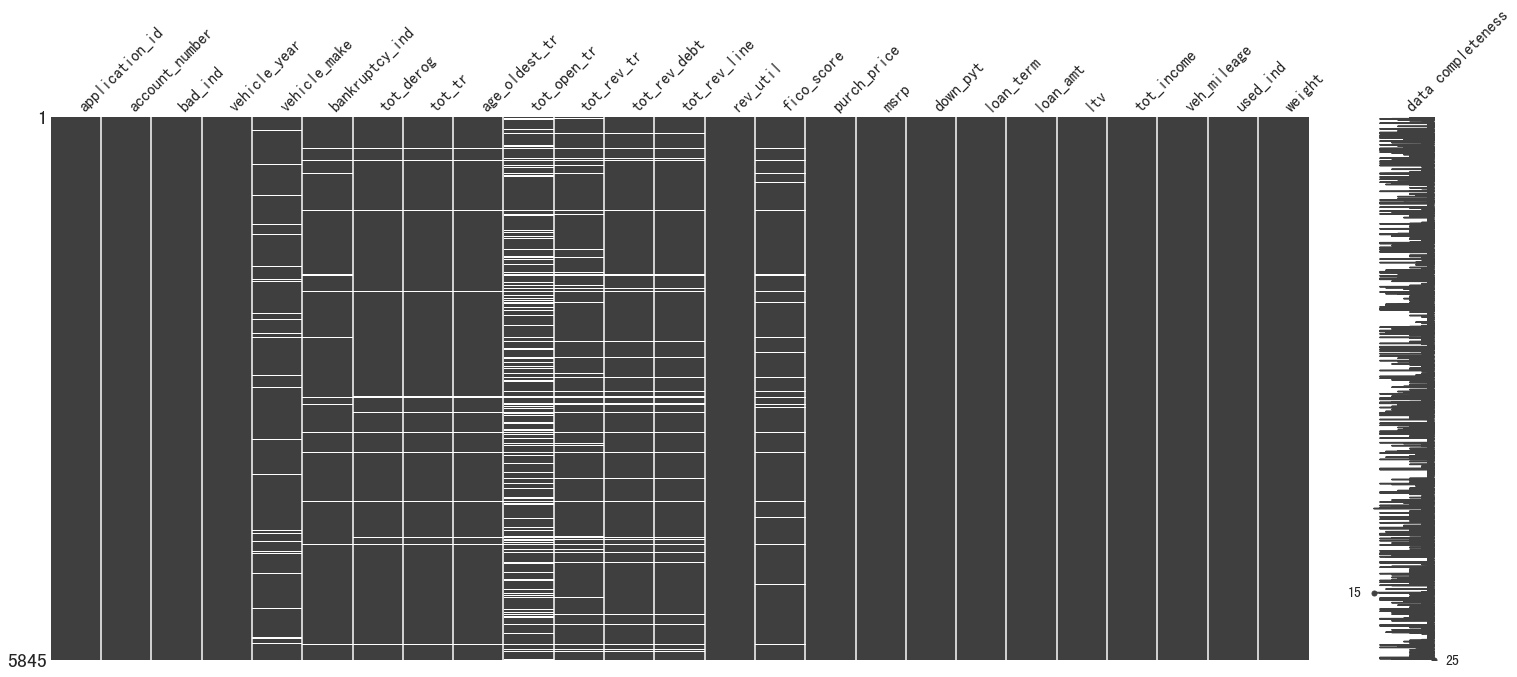

In [13]:
import missingno as msno
msno.matrix(data_raw, labels=True)
# msno.heatmap(data)
#msno.dendrogram(data)

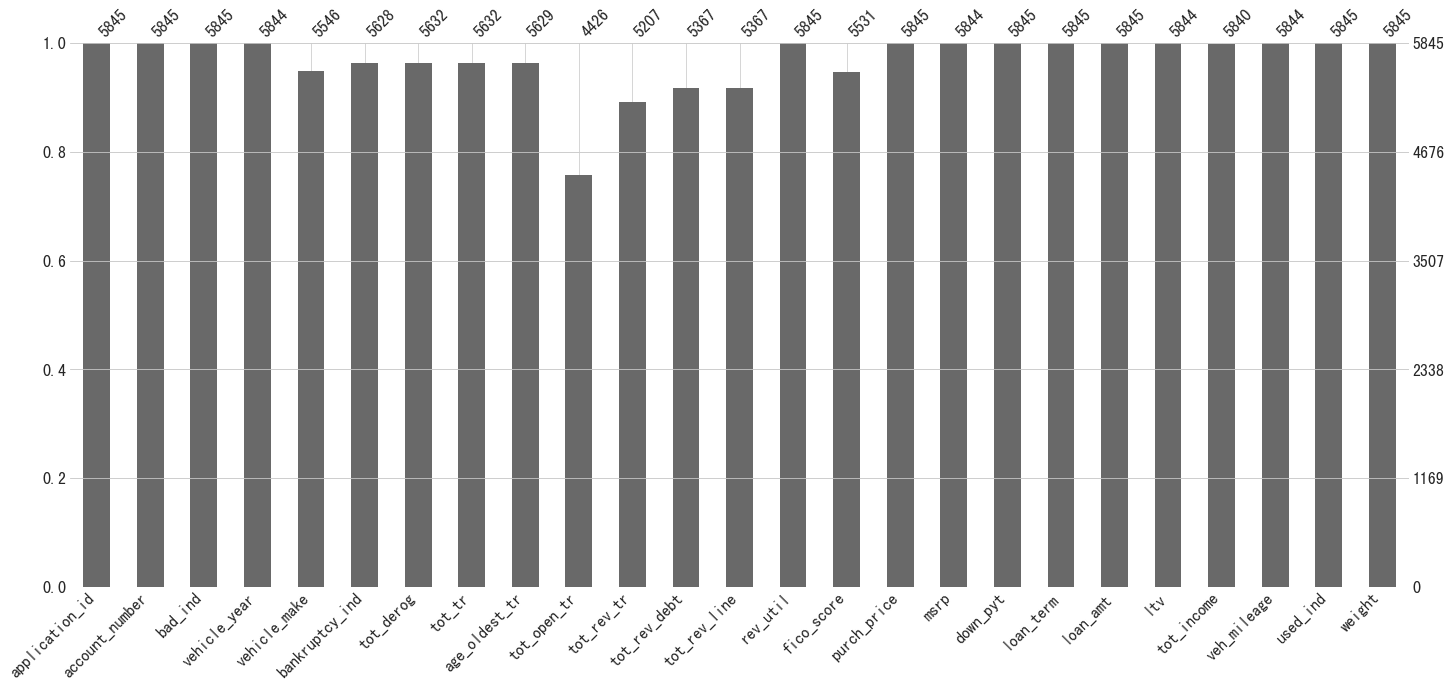

In [14]:
import missingno as msno
msno.bar(data_raw, labels=True)

<font color=red size=3> 模块三，特征工程 </font>

<font color=red size=3>  3.1 数据的变换与规约 </font>

<font color=red size=3> 衍生变量 </font>

In [15]:
def divMy(x,y):
    import numpy as np
    if x==np.nan or y==np.nan:
        return np.nan
    elif y==0:
        return -1
    else:
        return x/y

In [16]:
##历史负债收入比:tot_rev_line/tot_income
data_raw["dti_hist"]=data_raw[["tot_rev_line","tot_income"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##本次新增负债收入比:loan_amt/tot_income
data_raw["dti_mew"]=data_raw[["loan_amt","tot_income"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##本次贷款首付比例:down_pyt/loan_amt
data_raw["fta"]=data_raw[["down_pyt","loan_amt"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##新增债务比:loan_amt/tot_rev_debt
data_raw["nth"]=data_raw[["loan_amt","tot_rev_debt"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##新增债务额度比:loan_amt/tot_rev_line
data_raw["nta"]=data_raw[["loan_amt","tot_rev_line"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)

data_raw.head()


,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight,dti_hist,dti_mew,fta,nth,nta
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00,0.076336,2.625954,0.000000,33.992095,34.400000
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75,12.265920,4.197541,0.034895,0.566061,0.342212
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00,NaN,5.250000,0.000000,NaN,NaN
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00,3.964000,7.200000,0.286944,2.687236,1.816347
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75,0.434363,6.353292,0.000000,-1.000000,14.626689


<font color=red size=3>  3.1 变量的基本情况 </font>

In [17]:
# 创建一个列表，用来保存所有的建模数据清洗的相关信息
DATA_CLEAN = []

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 30 columns):
application_id    5845 non-null int64
account_number    5845 non-null int64
bad_ind           5845 non-null int64
vehicle_year      5844 non-null float64
vehicle_make      5546 non-null object
bankruptcy_ind    5628 non-null object
tot_derog         5632 non-null float64
tot_tr            5632 non-null float64
age_oldest_tr     5629 non-null float64
tot_open_tr       4426 non-null float64
tot_rev_tr        5207 non-null float64
tot_rev_debt      5367 non-null float64
tot_rev_line      5367 non-null float64
rev_util          5845 non-null int64
fico_score        5531 non-null float64
purch_price       5845 non-null float64
msrp              5844 non-null float64
down_pyt          5845 non-null float64
loan_term         5845 non-null int64
loan_amt          5845 non-null float64
ltv               5844 non-null float64
tot_income        5840 non-null float64
veh_mileage       5844 no

In [19]:
list(data_raw)

['application_id',
 'account_number',
 'bad_ind',
 'vehicle_year',
 'vehicle_make',
 'bankruptcy_ind',
 'tot_derog',
 'tot_tr',
 'age_oldest_tr',
 'tot_open_tr',
 'tot_rev_tr',
 'tot_rev_debt',
 'tot_rev_line',
 'rev_util',
 'fico_score',
 'purch_price',
 'msrp',
 'down_pyt',
 'loan_term',
 'loan_amt',
 'ltv',
 'tot_income',
 'veh_mileage',
 'used_ind',
 'weight',
 'dti_hist',
 'dti_mew',
 'fta',
 'nth',
 'nta']

<font color=red size=3> 设置自变量与因变量 </font>

In [20]:
#x_var_d，分类变量：目前vehicle_year、vehicle_make、bankruptcy_ind、used_ind这些分类变量
#x_var_c，连续变量

In [21]:

y_var = 'bad_ind'
x_var_c = ['tot_tr',
           'age_oldest_tr', 'tot_open_tr', 'tot_rev_tr', 'tot_rev_debt', 'tot_rev_line', 'rev_util', 'fico_score', 'purch_price',
            'msrp', 'loan_term', 'loan_amt', 'ltv', 'tot_income', 'veh_mileage', 'dti_hist',
            'dti_mew',  'nth', 'nta']
x_var_d=['vehicle_year','bankruptcy_ind','used_ind']
data_x_raw = data_raw[x_var_c + x_var_d]
data_y_raw = data_raw[y_var]

<font color=red size=3> 3.2 分类变量的筛选与规范化 </font>

<font color=red size=3> 3.2.1  分类变量的交叉表与卡方检验 </font>

In [22]:
from scipy import stats

In [23]:
def chi2_test(x,y):
    cross_table=pd.crosstab(x,y,margins=True)
    cross_table.apply(lambda s:s/cross_table['All'])
    stats.chi2_contingency(cross_table.iloc[:2, :2])
    print('''chisq = %6.4f 
p-value = %6.4f
dof = %i 
expected_freq = %s'''  %stats.chi2_contingency(cross_table.iloc[:2, :2]))

In [24]:
chi2_test(data_raw.used_ind,data_raw.bad_ind)

chisq = 17.2265 
p-value = 0.0000
dof = 1 
expected_freq = [[2023.01317365  520.98682635]
 [2624.98682635  676.01317365]]


In [25]:
chi2_test(data_raw.vehicle_make,data_raw.bad_ind)

chisq = 0.1875 
p-value = 0.6650
dof = 1 
expected_freq = [[0.66666667 0.33333333]
 [1.33333333 0.66666667]]


In [26]:
chi2_test(data_raw.vehicle_year,data_raw.bad_ind)

chisq = 0.5228 
p-value = 0.4697
dof = 1 
expected_freq = [[2.36207358e+02 6.17926421e+01]
 [7.92642140e-01 2.07357860e-01]]


<font color=red size=3> 3.2.2  WOE转换与IV值筛选 </font>

In [27]:
import sys
sys.path.append('E:\python\myscripts')
from woe import WoE

In [28]:
iv_d={}
for i in x_var_d:
    iv_d[i]=WoE(v_type='d').fit(data_x_raw[i].copy(),data_y_raw.copy()).iv

In [29]:
x_var_d_select=pd.DataFrame(pd.Series(iv_d).sort_values(ascending = False),columns=['a'])

In [30]:
x_var_d_select

,a
vehicle_year,0.036389
bankruptcy_ind,0.030132
used_ind,0.018641


In [31]:
x_var_d_select=x_var_d_select[x_var_d_select.a>0.02]

In [32]:
x_var_d_select=x_var_d_select.index.tolist()

In [33]:
x_var_d_select

['vehicle_year', 'bankruptcy_ind']

In [34]:
data_x_repaired=data_x_raw[x_var_c+x_var_d_select]
data_x_repaired.head()

,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,loan_term,loan_amt,ltv,tot_income,veh_mileage,dti_hist,dti_mew,nth,nta,vehicle_year,bankruptcy_ind
0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,36,17200.00,99.0,6550.00,24000.0,0.076336,2.625954,33.992095,34.400000,1998.0,N
1,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,60,19588.54,99.0,4666.67,22.0,12.265920,4.197541,0.566061,0.342212,2000.0,N
2,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,60,10500.00,92.0,2000.00,19600.0,NaN,5.250000,NaN,NaN,1998.0,N
3,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,60,10800.00,118.0,1500.00,10000.0,3.964000,7.200000,2.687236,1.816347,1997.0,N
4,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,60,26328.04,122.0,4144.00,14.0,0.434363,6.353292,-1.000000,14.626689,2000.0,N


<font color=red size=3> 分类变量的概化与WOE转换 </font>

In [35]:
data_vehicleyear_gr=data_raw[['vehicle_year','bad_ind']].groupby('vehicle_year',as_index = False)

In [36]:
data_vehicleyear_count=data_vehicleyear_gr['bad_ind'].agg({'mean':'mean','count':'count'}).sort_values("count")

In [37]:
data_vehicleyear_count['cumsum']=data_vehicleyear_count['count'].cumsum()

In [38]:
data_vehicleyear_count['newyear']=data_vehicleyear_count['cumsum'].apply(lambda x:x/(len(data_raw)/5)).astype(int)

In [39]:
data_vehicleyear_count=data_vehicleyear_count[(data_vehicleyear_count['vehicle_year']<2001)&(data_vehicleyear_count['vehicle_year']>1980)]

In [40]:
data_vehicleyear_count

,vehicle_year,mean,count,cumsum,newyear
2,1982.0,1.000000,1,2,0
3,1985.0,0.000000,1,3,0
5,1988.0,0.000000,1,4,0
4,1986.0,0.500000,2,7,0
6,1989.0,0.333333,3,10,0
7,1990.0,0.083333,12,26,0
8,1991.0,0.052632,19,45,0
9,1992.0,0.250000,32,77,0
10,1993.0,0.227848,79,156,0
11,1994.0,0.282353,170,326,0


In [41]:
data_vehicleyear_count[['newyear','count']].groupby('newyear').sum()

,count
newyear,
0,592
1,1107
2,713
3,1045
4,2083


In [42]:
vehicleyear_labels=data_vehicleyear_count[['vehicle_year','newyear']].set_index('vehicle_year').to_dict()

In [43]:
data_x_repaired['vehicle_year']=data_x_repaired['vehicle_year'].map(vehicleyear_labels['newyear'])

In [44]:
data_x_repaired.head()

,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,loan_term,loan_amt,ltv,tot_income,veh_mileage,dti_hist,dti_mew,nth,nta,vehicle_year,bankruptcy_ind
0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,36,17200.00,99.0,6550.00,24000.0,0.076336,2.625954,33.992095,34.400000,1.0,N
1,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,60,19588.54,99.0,4666.67,22.0,12.265920,4.197541,0.566061,0.342212,4.0,N
2,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,60,10500.00,92.0,2000.00,19600.0,NaN,5.250000,NaN,NaN,1.0,N
3,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,60,10800.00,118.0,1500.00,10000.0,3.964000,7.200000,2.687236,1.816347,2.0,N
4,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,60,26328.04,122.0,4144.00,14.0,0.434363,6.353292,-1.000000,14.626689,4.0,N


<font color=red size=3> 分类变量的二值化 </font>

In [45]:
from sklearn import preprocessing

In [46]:
data_x_repaired=data_x_repaired[data_x_repaired['bankruptcy_ind'].notna()]

In [47]:
labelen=preprocessing.LabelEncoder()

In [48]:
data_x_repaired['bankruptcy_ind']=labelen.fit_transform(data_x_repaired[['bankruptcy_ind']].values)

In [49]:
data_x_repaired.head()

,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,loan_term,loan_amt,ltv,tot_income,veh_mileage,dti_hist,dti_mew,nth,nta,vehicle_year,bankruptcy_ind
0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,36,17200.00,99.0,6550.00,24000.0,0.076336,2.625954,33.992095,34.400000,1.0,0
1,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,60,19588.54,99.0,4666.67,22.0,12.265920,4.197541,0.566061,0.342212,4.0,0
2,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,60,10500.00,92.0,2000.00,19600.0,NaN,5.250000,NaN,NaN,1.0,0
3,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,60,10800.00,118.0,1500.00,10000.0,3.964000,7.200000,2.687236,1.816347,2.0,0
4,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,60,26328.04,122.0,4144.00,14.0,0.434363,6.353292,-1.000000,14.626689,4.0,0


<font color=red size=3> 3.3 连续变量的筛选与规范化 </font>

<font color=red size=3>  3.3,1 WOE选择变量 </font>

In [50]:
iv_c={}
for i in x_var_c:
    iv_c[i]=WoE(v_type='c',t_type='b',qnt_num=3).fit(data_x_raw[i].copy(),data_y_raw.copy()).iv

In [51]:
x_var_c_woe=pd.Series(iv_c).sort_values(ascending = False)[pd.Series(iv_c).sort_values(ascending = False)>0.02].index

In [52]:
pd.Series(iv_c).sort_values(ascending = False)

fico_score       0.724730
tot_rev_line     0.368499
nta              0.315410
dti_hist         0.293146
age_oldest_tr    0.236852
rev_util         0.159759
ltv              0.155953
tot_tr           0.129646
tot_rev_tr       0.071730
tot_rev_debt     0.062536
nth              0.059873
tot_income       0.059364
veh_mileage      0.037718
dti_mew          0.034909
purch_price      0.027539
msrp             0.026451
tot_open_tr      0.023910
loan_amt         0.005815
loan_term        0.003324
dtype: float64

In [53]:
x_var_c_woe=x_var_c_woe.to_list()

In [54]:
x_var_c_woe

['fico_score',
 'tot_rev_line',
 'nta',
 'dti_hist',
 'age_oldest_tr',
 'rev_util',
 'ltv',
 'tot_tr',
 'tot_rev_tr',
 'tot_rev_debt',
 'nth',
 'tot_income',
 'veh_mileage',
 'dti_mew',
 'purch_price',
 'msrp',
 'tot_open_tr']

<font color=red size=3>  3.3,2 向前法根据AIC选择变量 </font>

In [55]:
#只有连续变量可以进行变量筛选，分类变量需要进行WOE转换才可以进行变量筛选

In [56]:
var_c_forward_select=[]
# 向前法
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            var_c_forward_select.append(best_candidate)
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break    
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [57]:
x_var_c_s=x_var_c_woe

In [58]:
x_var_c_s.append(y_var)

In [59]:
data_raw_forselect=data_raw[x_var_c_s]

In [60]:
lg_m1 = forward_select(data=data_raw_forselect, response='bad_ind')
lg_m1.summary()

aic is 4313.645322040558,continuing!
aic is 3777.9942002712783,continuing!
aic is 3644.1100213117547,continuing!
aic is 3596.9072586682773,continuing!
aic is 3581.936068320804,continuing!
aic is 3578.214780375815,continuing!
aic is 3576.846186261635,continuing!
aic is 3575.5650404770386,continuing!
aic is 3575.2107296542936,continuing!
aic is 3575.11169543479,continuing!
forward selection over!
final formula is bad_ind ~ tot_open_tr + fico_score + ltv + tot_rev_line + age_oldest_tr + dti_mew + rev_util + dti_hist + nth + tot_rev_tr 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bad_ind   No. Observations:                 4355
Model:                            GLM   Df Residuals:                     4344
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1776.6
Date:                Sat, 06 Apr 2019   Deviance:                       3553.1
Time:                        16:30:09   Pearson chi2:                 4.18e+03
No. Iterations:                     9   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6081      0.643      8.719      0.000       4.347       6.869
tot_open_tr      -0.0063      0.023     -0.272      0.786      -0.052       0.039
fico_score       -0.0139      0.001    -14.947      0.000      -0.016      -0.012
ltv               0.0275      0.003      9.730      0.000       0.022       0.033
tot_rev_line  -1.606e-05   4.72e-06     -3.406      0.001   -2.53e-05   -6.82e-06
age_oldest_tr    -0.0022      0.001     -4.038      0.000      -0.003      -0.001
dti_mew           0.0082      0.006      1.273      0.203      -0.004       0.021
rev_util          0.0008      0.000      1.685      0.092      -0.000       0.002
dti_hist         -0.0123      0.014     -0.869      0.385      -0.040       0.015
nth               0.0002      0.000      1.634      0.102   -4.14e-05       0.000
tot_rev_tr        0.0475      0.033      1.445      0.148      -0.017       0.112
=================================================================================
"""

In [61]:
var_c_forward_select

['tot_open_tr',
 'fico_score',
 'ltv',
 'tot_rev_line',
 'age_oldest_tr',
 'dti_mew',
 'rev_util',
 'dti_hist',
 'nth',
 'tot_rev_tr']

In [62]:
data_x_repaired=data_x_repaired[var_c_forward_select+x_var_d_select]
data_x_repaired.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,dti_mew,rev_util,dti_hist,nth,tot_rev_tr,vehicle_year,bankruptcy_ind
0,2.0,650.0,99.0,500.0,64.0,2.625954,101,0.076336,33.992095,1.0,1.0,0
1,11.0,649.0,99.0,57241.0,240.0,4.197541,60,12.265920,0.566061,7.0,4.0,0
2,NaN,613.0,92.0,NaN,60.0,5.250000,0,NaN,NaN,NaN,1.0,0
3,5.0,603.0,118.0,5946.0,35.0,7.200000,68,3.964000,2.687236,4.0,2.0,0
4,2.0,764.0,122.0,1800.0,104.0,6.353292,0,0.434363,-1.000000,0.0,4.0,0


<font color=red size=3>  3.1,3 多重共线性诊断选择变量 </font>

In [63]:
#VIF判定
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = smf.ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [64]:
data_test=data_x_repaired[var_c_forward_select]

In [65]:
data_test.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,dti_mew,rev_util,dti_hist,nth,tot_rev_tr
0,2.0,650.0,99.0,500.0,64.0,2.625954,101,0.076336,33.992095,1.0
1,11.0,649.0,99.0,57241.0,240.0,4.197541,60,12.265920,0.566061,7.0
2,NaN,613.0,92.0,NaN,60.0,5.250000,0,NaN,NaN,NaN
3,5.0,603.0,118.0,5946.0,35.0,7.200000,68,3.964000,2.687236,4.0
4,2.0,764.0,122.0,1800.0,104.0,6.353292,0,0.434363,-1.000000,0.0


In [66]:
var_vif={}
for i in data_test.columns:
    var_vif.update({i:vif(df=data_test, col_i=i)})

In [67]:
var_vif

{'tot_open_tr': 3.2333633073568575,
 'fico_score': 1.385169140333883,
 'ltv': 1.0316154378328113,
 'tot_rev_line': 1.8870585061615726,
 'age_oldest_tr': 1.281736529181638,
 'dti_mew': 9.699786388328917,
 'rev_util': 1.1149705096729743,
 'dti_hist': 9.728600717947252,
 'nth': 1.0136897770154423,
 'tot_rev_tr': 3.65026108668901}

In [68]:
var_vif_selected=pd.DataFrame(var_vif,index=['a']).T[pd.DataFrame(var_vif,index=['a']).T.values<9].index

In [69]:
var_vif_selected=var_vif_selected.to_list()

In [70]:
data_x_repaired=data_x_repaired[var_vif_selected+x_var_d_select]
data_x_repaired.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,rev_util,nth,tot_rev_tr,vehicle_year,bankruptcy_ind
0,2.0,650.0,99.0,500.0,64.0,101,33.992095,1.0,1.0,0
1,11.0,649.0,99.0,57241.0,240.0,60,0.566061,7.0,4.0,0
2,NaN,613.0,92.0,NaN,60.0,0,NaN,NaN,1.0,0
3,5.0,603.0,118.0,5946.0,35.0,68,2.687236,4.0,2.0,0
4,2.0,764.0,122.0,1800.0,104.0,0,-1.000000,0.0,4.0,0


<font color=red size=3> 3.1.4  连续变量筛选后的数据清洗--缺失值填充 </font>

In [71]:
data_x_c_repaired=data_x_repaired[var_vif_selected]
data_x_c_repaired.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,rev_util,nth,tot_rev_tr
0,2.0,650.0,99.0,500.0,64.0,101,33.992095,1.0
1,11.0,649.0,99.0,57241.0,240.0,60,0.566061,7.0
2,NaN,613.0,92.0,NaN,60.0,0,NaN,NaN
3,5.0,603.0,118.0,5946.0,35.0,68,2.687236,4.0
4,2.0,764.0,122.0,1800.0,104.0,0,-1.000000,0.0


In [72]:
data_x_c_repaired.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5628 entries, 0 to 5844
Data columns (total 8 columns):
tot_open_tr      4424 non-null float64
fico_score       5525 non-null float64
ltv              5627 non-null float64
tot_rev_line     5335 non-null float64
age_oldest_tr    5564 non-null float64
rev_util         5628 non-null int64
nth              5335 non-null float64
tot_rev_tr       5187 non-null float64
dtypes: float64(7), int64(1)
memory usage: 395.7 KB


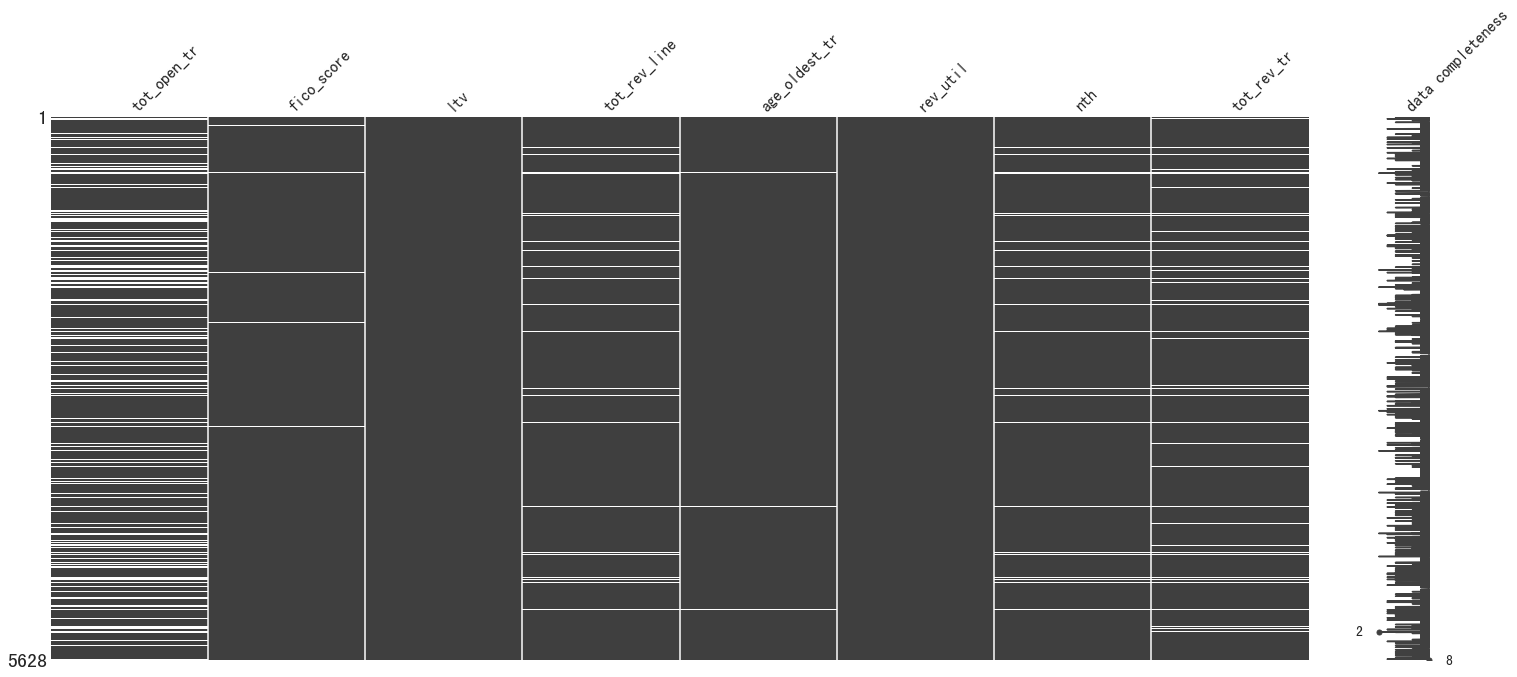

In [73]:
import missingno as msno
msno.matrix(data_x_c_repaired, labels=True)
# msno.heatmap(data)
#msno.dendrogram(data)

<font color=red size=3> 缺失值填充 </font>

In [74]:
x_var_c_repaired=data_x_c_repaired.columns

In [75]:
for i in x_var_c_repaired:
    data_x_c_repaired[i].fillna(value=data_x_c_repaired[i].copy().median(),inplace=True)

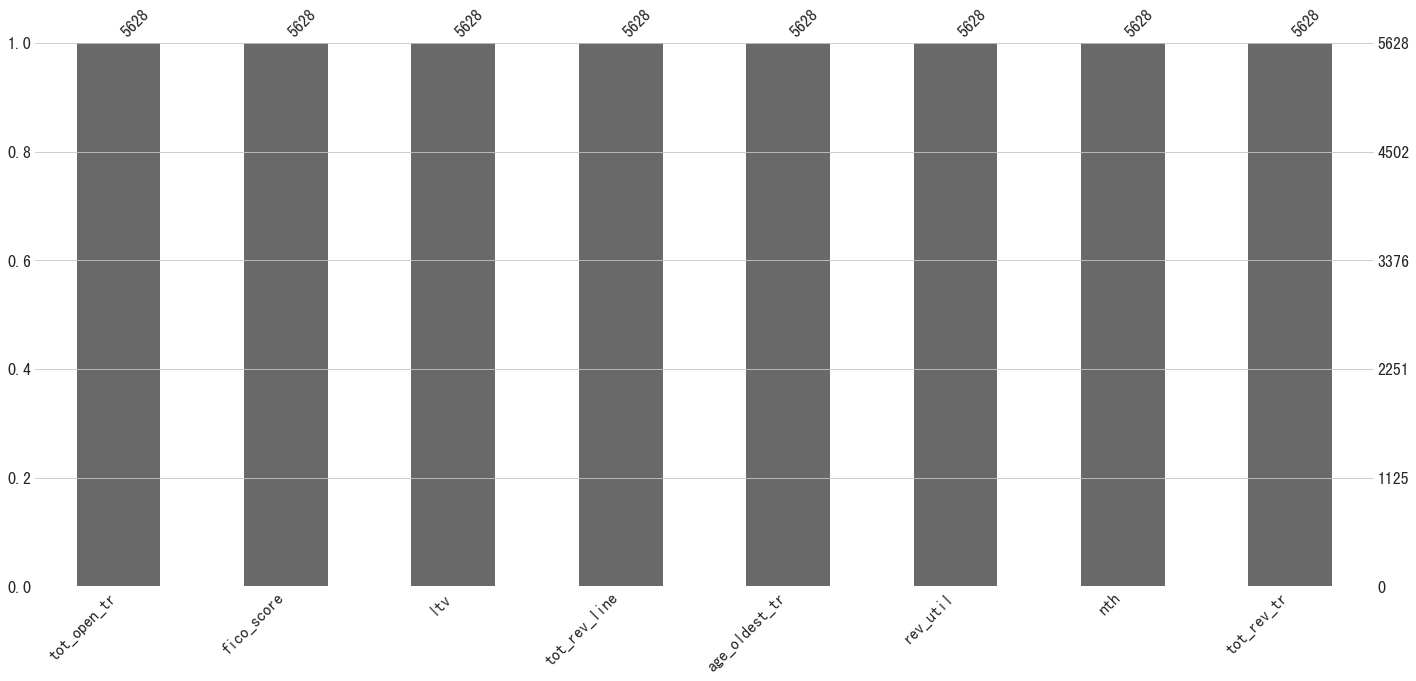

In [76]:
msno.bar(data_x_c_repaired)

In [77]:
data_x_c_repaired.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5628 entries, 0 to 5844
Data columns (total 8 columns):
tot_open_tr      5628 non-null float64
fico_score       5628 non-null float64
ltv              5628 non-null float64
tot_rev_line     5628 non-null float64
age_oldest_tr    5628 non-null float64
rev_util         5628 non-null int64
nth              5628 non-null float64
tot_rev_tr       5628 non-null float64
dtypes: float64(7), int64(1)
memory usage: 395.7 KB


In [78]:
data_x_repaired[var_vif_selected]=data_x_c_repaired

<font color=red size=3> 3.1.5  连续变量异常值寻找 </font>

In [79]:
x_var_c_repaired

Index(['tot_open_tr', 'fico_score', 'ltv', 'tot_rev_line', 'age_oldest_tr',
       'rev_util', 'nth', 'tot_rev_tr'],
      dtype='object')

In [80]:
abs((data_x_c_repaired[x_var_c_repaired].mode().iloc[0,] - data_x_c_repaired[x_var_c_repaired].median()) /
    (data_x_c_repaired[x_var_c_repaired].quantile(0.75) - data_x_c_repaired[x_var_c_repaired].quantile(0.25)))

tot_open_tr      0.000000
fico_score       0.000000
ltv              0.000000
tot_rev_line     0.000000
age_oldest_tr    0.000000
rev_util         0.516667
nth              0.472749
tot_rev_tr       0.000000
dtype: float64

<font color=red size=3> 3.1.6  连续变量正态分布检验 </font>

In [81]:
skew_var_x={}
for i in x_var_c_repaired:
    skew_var_x[i] = abs(data_x_c_repaired[i].skew())  
skew = pd.Series(skew_var_x).sort_values(ascending=False)
skew

nth              47.241780
rev_util         14.363256
tot_rev_line      2.228698
tot_rev_tr        1.757906
tot_open_tr       1.641392
age_oldest_tr     0.921242
ltv               0.614401
fico_score        0.148855
dtype: float64

In [82]:
var_x_ln = skew.index[skew > 1]
var_x_ln

Index(['nth', 'rev_util', 'tot_rev_line', 'tot_rev_tr', 'tot_open_tr'], dtype='object')

In [83]:
for i in var_x_ln:
    if min(data_x_c_repaired[i]) <= 0:
        data_x_c_repaired[i] =np.log(data_x_c_repaired[i] + abs(min(data_x_c_repaired[i])) + 0.01)
    else:
        data_x_c_repaired[i] =np.log(data_x_c_repaired[i])

In [84]:
for i in var_x_ln:
    skew_var_x[i] = abs(data_x_c_repaired[i].skew())  
skew = pd.Series(skew_var_x).sort_values(ascending=False)
skew

tot_rev_line     3.704956
tot_rev_tr       2.715526
rev_util         1.567193
nth              1.143489
tot_open_tr      0.993597
age_oldest_tr    0.921242
ltv              0.614401
fico_score       0.148855
dtype: float64

In [85]:
data_x_repaired[var_vif_selected]=data_x_c_repaired

In [86]:
data_x_repaired.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,rev_util,nth,tot_rev_tr,vehicle_year,bankruptcy_ind
0,0.698135,650.0,99.0,6.214628,64.0,4.615220,3.555408,0.009950,1.0,0
1,2.398804,649.0,99.0,10.955026,240.0,4.094511,0.454929,1.947338,4.0,0
2,1.611436,613.0,92.0,9.277626,60.0,-4.605170,1.670286,1.101940,1.0,0
3,1.611436,603.0,118.0,8.690476,35.0,4.219655,1.307585,1.388791,2.0,0
4,0.698135,764.0,122.0,7.495547,104.0,-4.605170,-4.605170,-4.605170,4.0,0


<font color=red size=3> 变量合并data model </font>

In [87]:
data_repaired=data_x_repaired

In [88]:
data_repaired['bad_ind']=data_raw['bad_ind']

In [89]:
data_repaired.head()

,tot_open_tr,fico_score,ltv,tot_rev_line,age_oldest_tr,rev_util,nth,tot_rev_tr,vehicle_year,bankruptcy_ind,bad_ind
0,0.698135,650.0,99.0,6.214628,64.0,4.615220,3.555408,0.009950,1.0,0,1
1,2.398804,649.0,99.0,10.955026,240.0,4.094511,0.454929,1.947338,4.0,0,0
2,1.611436,613.0,92.0,9.277626,60.0,-4.605170,1.670286,1.101940,1.0,0,1
3,1.611436,603.0,118.0,8.690476,35.0,4.219655,1.307585,1.388791,2.0,0,1
4,0.698135,764.0,122.0,7.495547,104.0,-4.605170,-4.605170,-4.605170,4.0,0,0


In [90]:
data_model=data_repaired

In [91]:
data_model=data_model.dropna(axis=1)

<font color=red size=3> 模块四，逻辑回归建模 </font>

<font color=red size=3> 4.1 数据拆分 </font>

In [92]:
from sklearn.model_selection import train_test_split
predictor=list(data_model.columns)
predictor.remove('bad_ind')
x_train,x_test,y_train,y_test=train_test_split(data_model[predictor],data_model['bad_ind'],train_size=0.8,test_size=0.2,random_state=1234)

In [93]:
import sklearn.linear_model as linear_model
logistic_model = linear_model.LogisticRegression(class_weight = None,
                                                 dual = False,
                                                 fit_intercept = True,
                                                 intercept_scaling = 1,
                                                 penalty = 'l1',
                                                 random_state = None,
                                                 tol = 0.001)

In [94]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
C = np.logspace(-3,0,20,base=10)
param_grid = {'C': C}
clf_cv = GridSearchCV(estimator=logistic_model, 
                      param_grid=param_grid, 
                      cv=5, 
                      scoring='roc_auc')
clf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.001  , 0.00144, 0.00207, 0.00298, 0.00428, 0.00616, 0.00886,
       0.01274, 0.01833, 0.02637, 0.03793, 0.05456, 0.07848, 0.11288,
       0.16238, 0.23357, 0.33598, 0.48329, 0.69519, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [95]:
clf_cv.best_params_

{'C': 1.0}

In [96]:
logistic_model = linear_model.LogisticRegression(C=clf_cv.best_params_["C"],
                                                 class_weight=None,
                                                 dual=False,
                                                 fit_intercept=True,
                                                 intercept_scaling=1,
                                                 penalty='l1',
                                                 random_state=None,
                                                 tol=0.001)
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False)

In [97]:
logistic_model.coef_

array([[ 0.07706213, -0.01414522,  0.02394973, -0.03865627, -0.00305484,
         0.00172413,  0.04654995, -0.04595257, -0.23812413]])

In [98]:


#%%
#目前vehicle_year、vehicle_make、bankruptcy_ind、used_ind这些分类变量无法通过逐步变量筛选法
#解决方案：
#1、逐一根据显著性测试
#2、使用决策树等方法筛选变量，但是多分类变量需要事先进行变量概化
#3、使用WOE转换，多分类变量也需要事先进行概化，使用scorecardpy包中的woe算法可以自动进行概化wq 
# 使用第一种方法3gv
#formula = '''bad_igb1i48\ u/lpplnd ~ fico_score+ltv+age_oldest_tr+tot_derog+nth+tot_open_tr+veh_mileage+rev_util+C(used_ind)+C(vehicle_year)+C(bankruptcy_ind)'''
formula = '''bad_ind ~ fico_score+ltv+age_oldest_tr+nth+tot_open_tr+rev_util'''
lg_m = smf.glm(formula=formula, data=data_model, 
             family=sm.families.Binomial(sm.families.links.logit)).fit()
lg_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bad_ind   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5621
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2396.1
Date:                Sat, 06 Apr 2019   Deviance:                       4792.1
Time:                        16:31:10   Pearson chi2:                 5.31e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.1759      0.530     13.546      0.000       6.138       8.214
fico_score       -0.0158      0.001    -21.024      0.000      -0.017      -0.014
ltv               0.0260      0.002     11.127      0.000       0.021       0.031
age_oldest_tr    -0.0027      0.000     -6.008      0.000      -0.004      -0.002
nth               0.0320      0.021      1.561      0.119      -0.008       0.072
tot_open_tr      -0.1025      0.074     -1.383      0.167      -0.248       0.043
rev_util         -0.0052      0.013     -0.406      0.684      -0.030       0.020
=================================================================================
"""

<font color=red size=3> 模块五，模型的评估 </font>

In [102]:
y_train_predict = logistic_model.predict(x_train)
y_test_predict = logistic_model.predict(x_test)
y_train_proba = logistic_model.predict_proba(x_train)[:, 1]  
y_test_proba = logistic_model.predict_proba(x_test)[:, 1]

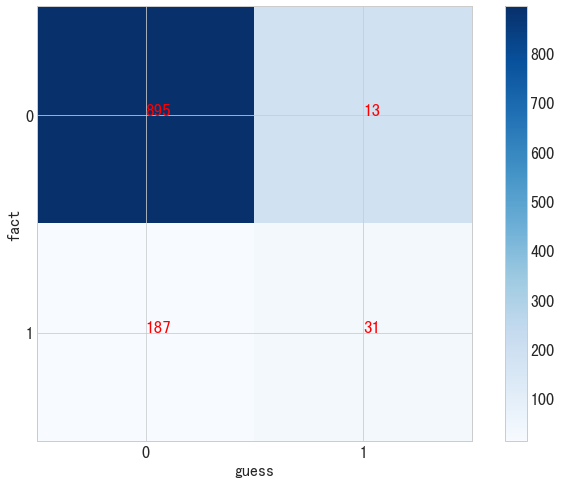

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
 

classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.figure(figsize=(12,8))
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

AUC = 0.7708


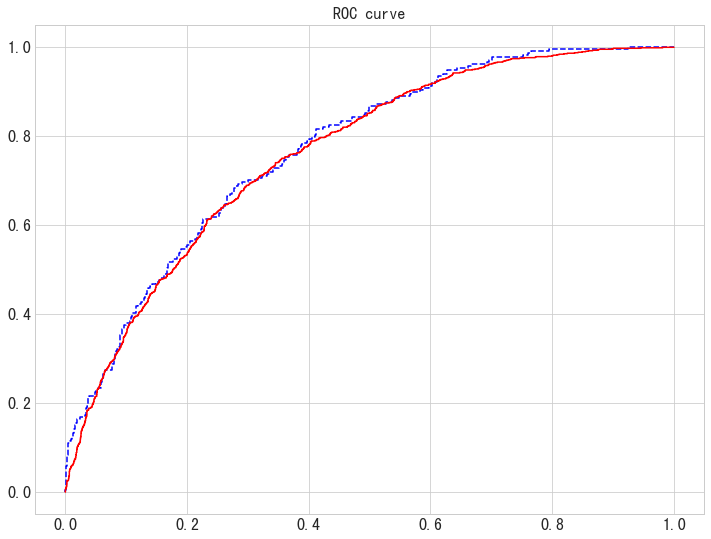

In [108]:
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))
import sklearn.metrics as metrics

fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=(12,9))
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()


# ## 构建神经网络并评估

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [101]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    activation='logistic', alpha=0.1, max_iter=1000)

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param_grid = {
    'hidden_layer_sizes':[(10, ), (15, ), (20, ), (5, 5)],
    'activation':['logistic', 'tanh', 'relu'], 
    'alpha':[0.001, 0.01, 0.1, 0.2, 0.4, 1, 10]
}
mlp = MLPClassifier(max_iter=1000)
gcv = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                   scoring='roc_auc', cv=4, n_jobs=-1)
gcv.fit(scaled_x_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(10,), (15,), (20,), (5, 5)], 'activation': ['logistic', 'tanh', 'relu'], 'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [103]:
gcv.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (15,)}

In [104]:
mlp = MLPClassifier(hidden_layer_sizes=gcv.best_params_["hidden_layer_sizes"], 
                    activation=gcv.best_params_["activation"], alpha=gcv.best_params_["alpha"], max_iter=1000)

mlp.fit(scaled_x_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [105]:
y_train_predict = mlp.predict(scaled_x_train)
y_test_predict = mlp.predict(scaled_x_test)
y_train_proba = mlp.predict_proba(scaled_x_train)[:, 1]  
y_test_proba = mlp.predict_proba(scaled_x_test)[:, 1]


from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1]))
print(metrics.classification_report(y_test, y_test_predict))

[[899   9]
 [189  29]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       908
           1       0.76      0.13      0.23       218

   micro avg       0.82      0.82      0.82      1126
   macro avg       0.79      0.56      0.56      1126
weighted avg       0.81      0.82      0.77      1126



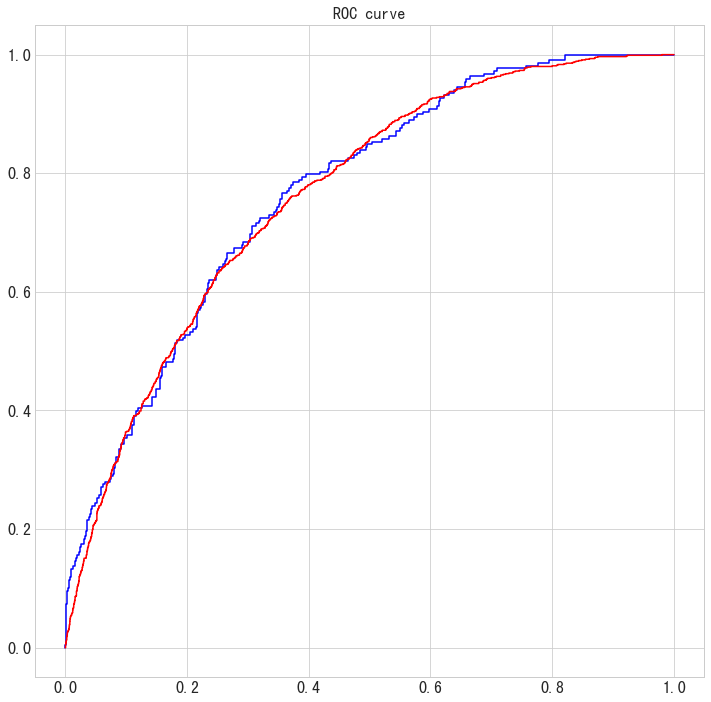

AUC = 0.7662


In [106]:
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

<font color=red size=3> GBDT建模对比 </font>

In [107]:
from sklearn import ensemble

In [127]:
param_grid = {
    'loss':['deviance','exponential'],
    'learning_rate':[0.1,0.3,0.5],
    'n_estimators':[20,30,40,50],  #决策树个数-GBDT特有参数
    'max_depth':[1,2,3],  #单棵树最大深度-GBDT特有参数
    'min_samples_split':[2,4,8,12],
    'subsample':[0.7,0.8,0.9]
    'max_features':range(2,10,2)
    
}

In [128]:
gbc = ensemble.GradientBoostingClassifier()
gbccv = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='roc_auc', cv=4)
gbccv.fit(x_train, y_train)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['deviance', 'exponential'], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 1], 'n_estimators': [10, 15, 20, 30, 40, 50], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 4, 8, 12, 16, 20], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [129]:
gbccv.best_params_

{'learning_rate': 0.3,
 'loss': 'exponential',
 'max_depth': 1,
 'min_samples_split': 16,
 'n_estimators': 40,
 'subsample': 0.85}

In [130]:
y_train_predict = gbccv.predict(x_train)
y_test_predict = gbccv.predict(x_test)
y_train_proba = gbccv.predict_proba(x_train)[:, 1]  
y_test_proba = gbccv.predict_proba(x_test)[:, 1]

In [131]:

print("gradient boosting accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

gradient boosting accuracy:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       908
           1       0.59      0.16      0.25       218

   micro avg       0.82      0.82      0.82      1126
   macro avg       0.71      0.56      0.57      1126
weighted avg       0.78      0.82      0.77      1126



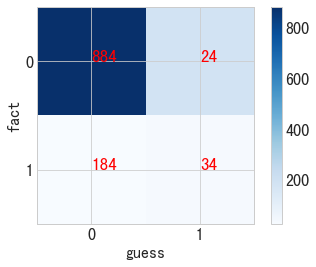

In [132]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

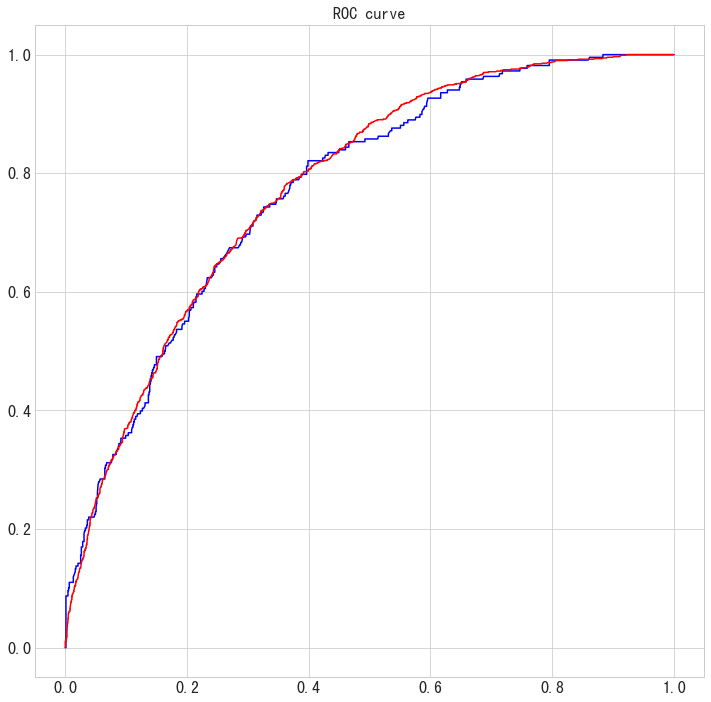

AUC = 0.7730


In [133]:
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

<font color=red size=3> 随机森林建模对比 </font>

In [140]:
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[6,7,8,10],
    'n_estimators':[11,13,15,20],  #决策树个数-随机森林特有参数
    'max_features':[0.3,0.4,0.5], #每棵决策树使用的变量占比-随机森林特有参数
    'min_samples_split':[3,8,10] 
}

In [141]:
rfc = ensemble.RandomForestClassifier()
rfccv = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=4)
rfccv.fit(x_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [6, 7, 8, 10], 'n_estimators': [11, 13, 15, 20], 'max_features': [0.3, 0.4, 0.5], 'min_samples_split': [3, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [142]:
rfccv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 0.4,
 'min_samples_split': 10,
 'n_estimators': 13}

In [143]:
y_train_predict = rfccv.predict(x_train)
y_test_predict = rfccv.predict(x_test)
y_train_proba = rfccv.predict_proba(x_train)[:, 1]  
y_test_proba = rfccv.predict_proba(x_test)[:, 1]

In [144]:

print("RandomForest accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

RandomForest accuracy:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       908
           1       0.75      0.08      0.15       218

   micro avg       0.82      0.82      0.82      1126
   macro avg       0.78      0.54      0.52      1126
weighted avg       0.81      0.82      0.75      1126



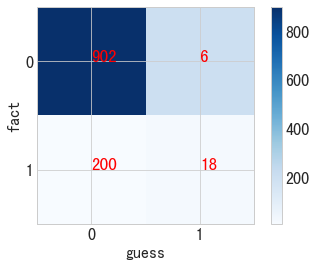

In [145]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

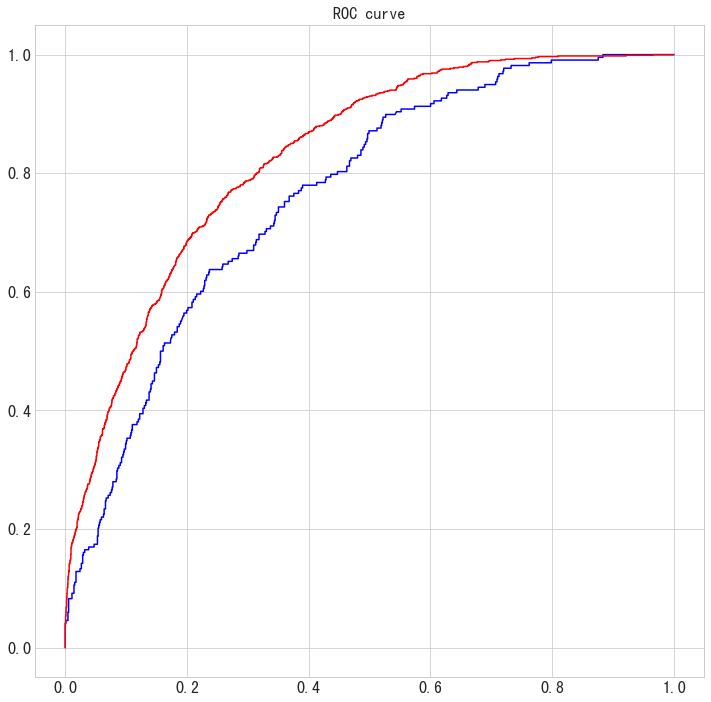

AUC = 0.7632


In [146]:
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

<font color=red size=3> XGboost建模对比 </font>

In [147]:
import xgboost as xgb

In [148]:
dtrain=xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

In [ ]:
#dtrain = xgb.DMatrix( data, label=label, missing = -999.0)  处理 DMatrix中的缺失值

In [ ]:
#w = np.random.rand(5,1)
#dtrain = xgb.DMatrix( data, label=label, missing = -999.0, weight=w)
#给样本设置权重时

<font color=red size=3> XGboost网格搜索 </font>

In [239]:
from xgboost.sklearn import XGBClassifier

<font color=red size=3> 参数搜索第一次 </font>

In [255]:
param_test1 = {
 'max_depth':[2,4],
 'n_estimators':[500,1000,2000],
 'learning_rate':[0.01,0.1]
}

In [256]:
xgb_grid_search1 = GridSearchCV(estimator = XGBClassifier(
    min_child_weight=1, 
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, seed=27), 
    param_grid = param_test1,
    scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_grid_search1.fit(x_train,y_train)
xgb_grid_search1.best_params_,xgb_grid_search1.best_score_

({'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000},
 0.7579507963304004)

<font color=red size=3> 参数搜索第二次 </font>

In [261]:
param_test2 = {
    'min_child_weight':[12,16], 
    'gamma':[0.1,0.2,0.5], 
    'subsample':[0.3,0.5]
}

In [262]:
xgb_grid_search2 = GridSearchCV(estimator = XGBClassifier(
     max_depth=2,
    n_estimators=1000,
    learning_rate=0.01,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, seed=27), 
    param_grid = param_test2,
    scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_grid_search2.fit(x_train,y_train)
xgb_grid_search2.best_params_,xgb_grid_search2.best_score_

({'gamma': 0.1, 'min_child_weight': 12, 'subsample': 0.5}, 0.7600056399631676)

<font color=red size=3> 参数搜索第三次 </font>

In [267]:
param_test3 = {
    'colsample_bytree':[0.2,0.4,0.8],
    'reg_alpha':[0.1,1,10]
}

In [268]:
xgb_grid_search3 = GridSearchCV(estimator = XGBClassifier(
    max_depth=2,
    n_estimators=1000,
    learning_rate=0.01,
    min_child_weight=12, 
    gamma=0.1, 
    subsample=0.5,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, seed=27), 
    param_grid = param_test3,
    scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_grid_search3.fit(x_train,y_train)
xgb_grid_search3.best_params_,xgb_grid_search3.best_score_

({'colsample_bytree': 0.8, 'reg_alpha': 0.1}, 0.7598509310415388)

<font color=red size=3> 最终训练 </font>

In [269]:
params = {
        'n_estimators':1000,
        'eta': 0.05, 
        'max_depth': 2, 
        'min_child_weight':12,
        'subsample': 0.5, 
        'colsample_bytree': 0.8, 
        'objective': 'binary:logistic', 
        'eval_metric': 'logloss', 
        'seed': 99, 
        'silent': True,
        'scale_pos_weight':7
    }

In [270]:
watchlist=[(dtrain,'train'),(dtest,'eval')]

In [271]:
xgbmodel = xgb.train(params,dtrain,evals=watchlist,num_boost_round=3000,early_stopping_rounds=100,verbose_eval=10)

[0]	train-logloss:0.692857	eval-logloss:0.692846
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[10]	train-logloss:0.691357	eval-logloss:0.691706
[20]	train-logloss:0.689227	eval-logloss:0.689863
[30]	train-logloss:0.689735	eval-logloss:0.691453
[40]	train-logloss:0.690837	eval-logloss:0.692433
[50]	train-logloss:0.690948	eval-logloss:0.693538
[60]	train-logloss:0.692621	eval-logloss:0.696069
[70]	train-logloss:0.693946	eval-logloss:0.697905
[80]	train-logloss:0.69545	eval-logloss:0.700288
[90]	train-logloss:0.6974	eval-logloss:0.702953
[100]	train-logloss:0.698762	eval-logloss:0.70461
[110]	train-logloss:0.700533	eval-logloss:0.70684
[120]	train-logloss:0.70229	eval-logloss:0.709271
Stopping. Best iteration:
[24]	train-logloss:0.688805	eval-logloss:0.689529



In [272]:
from xgboost import plot_importance

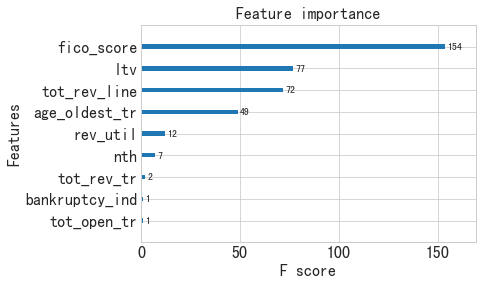

In [273]:
plot_importance(xgbmodel)

In [274]:
x_train_d=xgb.DMatrix(x_train)
x_test_d=xgb.DMatrix(x_test)

In [275]:

y_train_proba = xgbmodel.predict(x_train_d)  
y_test_proba = xgbmodel.predict(x_test_d)
y_train_predict = [round(i) for i in y_train_proba]
y_test_predict = [round(i) for i in y_test_proba]

In [276]:

print("gradient boosting accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

gradient boosting accuracy:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58       908
           1       0.27      0.91      0.42       218

   micro avg       0.51      0.51      0.51      1126
   macro avg       0.61      0.66      0.50      1126
weighted avg       0.82      0.51      0.55      1126



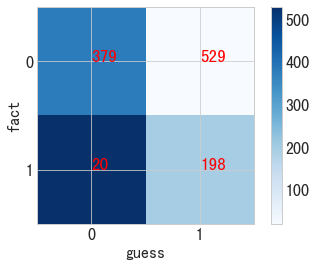

In [277]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

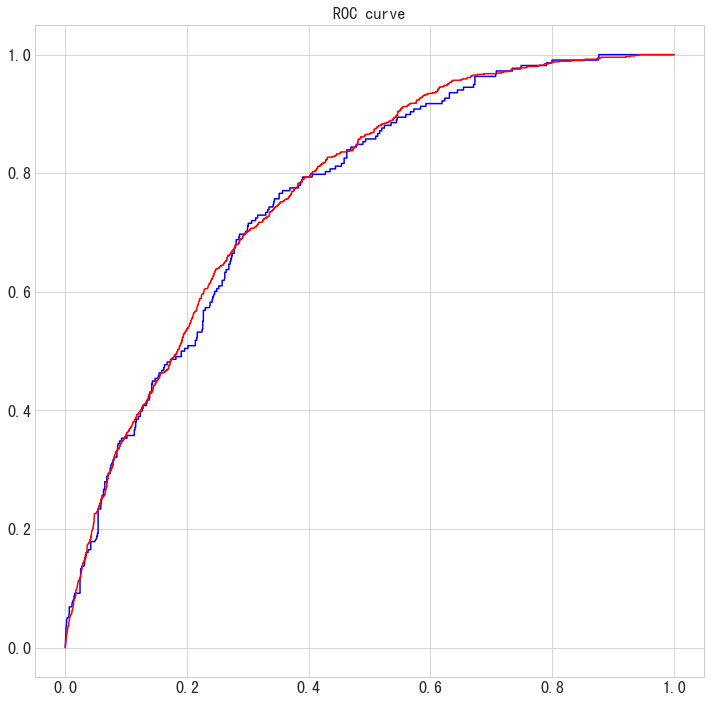

AUC = 0.7629


In [278]:

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()


In [279]:
digraph = xgb.to_graphviz(xgbmodel)
digraph.format = 'png'
digraph.view()


'Digraph.gv.png'

<font color=red size=3> 基于高斯分布的异常检测 </font>

In [287]:
for i in x_var_c_repaired:
    print(i,data_model[i].skew())


tot_open_tr -0.9935965142137847
fico_score -0.1488546151942997
ltv -0.6144006087283834
tot_rev_line -3.704956029247435
age_oldest_tr 0.9212417767898473
rev_util -1.56719348525584
nth -1.143488715701864
tot_rev_tr -2.7155259182758913


In [296]:
from scipy.stats import multivariate_normal

In [308]:
mu=x_train.mean().values

In [309]:
sigma=x_train.cov().values

In [310]:
model_normal=multivariate_normal(cov=sigma,mean=mu,allow_singular=True)

In [428]:
scores=[]
tresholds=np.linspace(-100,-10,30)
for treshold in tresholds:
    y_train_predict=(model_normal.logpdf(x_train)<treshold).astype('int')
    scores.append(['%.2f'%treshold,'%.2f'%metrics.recall_score(y_train,y_train_predict),'%.2f'%metrics.precision_score(y_train,y_train_predict)])
scores=np.array(scores)
print(scores)

[['-100.00' '0.00' '0.00']
 ['-96.90' '0.00' '0.00']
 ['-93.79' '0.00' '0.00']
 ['-90.69' '0.00' '0.00']
 ['-87.59' '0.00' '0.00']
 ['-84.48' '0.00' '0.00']
 ['-81.38' '0.00' '0.00']
 ['-78.28' '0.00' '0.00']
 ['-75.17' '0.00' '0.00']
 ['-72.07' '0.00' '0.00']
 ['-68.97' '0.00' '0.00']
 ['-65.86' '0.00' '0.00']
 ['-62.76' '0.00' '0.00']
 ['-59.66' '0.00' '0.00']
 ['-56.55' '0.00' '0.00']
 ['-53.45' '0.00' '0.00']
 ['-50.34' '0.00' '0.00']
 ['-47.24' '0.00' '0.24']
 ['-44.14' '0.01' '0.22']
 ['-41.03' '0.03' '0.27']
 ['-37.93' '0.03' '0.26']
 ['-34.83' '0.04' '0.23']
 ['-31.72' '0.08' '0.24']
 ['-28.62' '0.13' '0.22']
 ['-25.52' '0.30' '0.23']
 ['-22.41' '0.58' '0.21']
 ['-19.31' '1.00' '0.20']
 ['-16.21' '1.00' '0.20']
 ['-13.10' '1.00' '0.20']
 ['-10.00' '1.00' '0.20']]


In [431]:
y_test_predict=(model_normal.logpdf(x_test)<-22.4).astype('int')

In [434]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.45      0.58       908
           1       0.21      0.62      0.32       218

   micro avg       0.48      0.48      0.48      1126
   macro avg       0.52      0.53      0.45      1126
weighted avg       0.71      0.48      0.53      1126



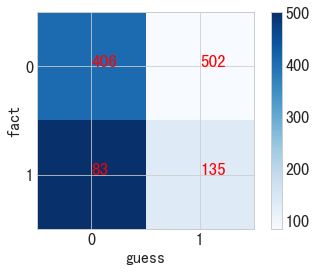

In [430]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

<font color=red size=3> 模块六，模型的应用与跟踪 </font>